# Abstract 



<img src="http://static.snopes.com/app/uploads/2017/01/titanic_sinking_tw.jpg" style="width:300px">



Perhaps even an appropriate movie

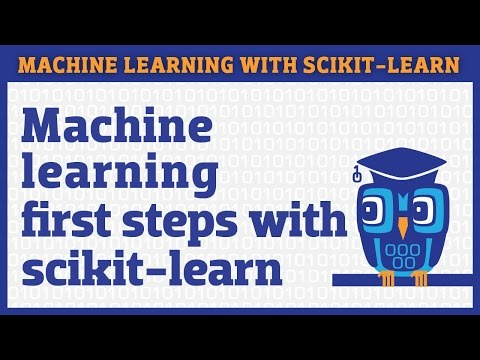

In [2]:
from IPython.lib.display import YouTubeVideo
YouTubeVideo('hd1W4CyPX58')

#Change Me

# Loading in the libraries.

In [1]:
# Old libraries that we know and love.
import numpy as np
import pandas as pa
import sklearn
import matplotlib.pylab as py
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Introduction

Read in the data

In [2]:
data = pa.read_csv('train.csv')
data1 = pa.read_csv('test.csv')

In [4]:

def plot_correlation_map( df ):
    corr = data.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 14 })

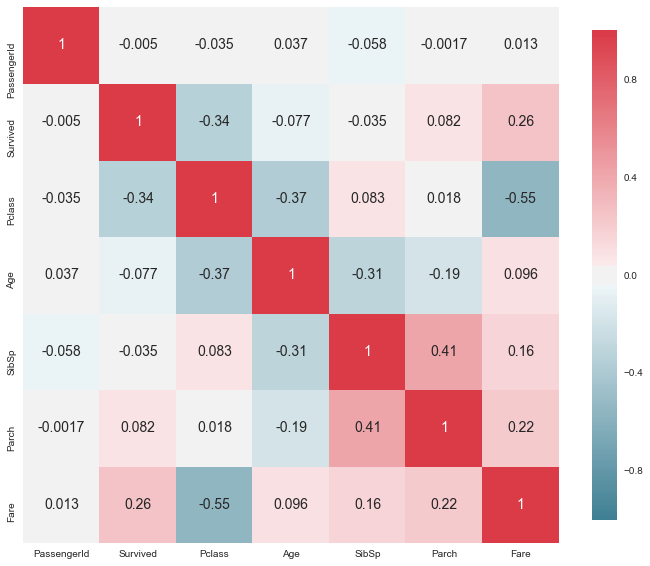

In [5]:
plot_correlation_map(data)

In [7]:
data.shape
data1.shape

(418, 11)

One hundred fifty measurement

In [8]:
data1.head(5)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [79]:
data1.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [3]:
data1.iloc[0,:]

PassengerId                 892
Pclass                        3
Name           Kelly, Mr. James
Sex                        male
Age                        34.5
SibSp                         0
Parch                         0
Ticket                   330911
Fare                     7.8292
Cabin                       NaN
Embarked                      Q
Name: 0, dtype: object

# Looking at the data

In [4]:
#X = np.array(data1.iloc[:, 1:])
X = np.array(data.iloc[:, 2:])
y = np.array(data.iloc[:, 1])
#passid = np.array(data1.iloc[:,0])

In [25]:
print(X[0,:])
print(y)
print(passid)

[3 'Braund, Mr. Owen Harris' 'male' 22.0 1 0 'A/5 21171' 7.25 nan 'S']
[0 1 1 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 1
 0 0 1 0 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1
 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 0 0 0 0
 0 0 1 1 1 1 0 1 0 1 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 1 0 0
 0 1 0 0 1 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 1 1
 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 1 0 0 1 0 0 1
 1 1 1 1 1 1 0 0 0 1 0 1 0 1 

In [5]:
X[2,:]

array([3, 'Heikkinen, Miss. Laina', 'female', 26.0, 0, 0,
       'STON/O2. 3101282', 7.925, nan, 'S'], dtype=object)

In [8]:
Xmf = X[:,2]== 'male'
Xmf = np.array(Xmf*1)
Xmf

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,

We have added the gender as a numeric variable.

Next we will change the embarked into a numerical data.  Passengers first arrived on the ship in South Hampton ("S"), then 6 hours later were added at Coulai (sp) ("C") and finally the ship made call in Queensland 12 hours after that ("Q")  We will assign these values of 1,2, and 4 respectively.

In [6]:
Xs = X[:,9]== 'S'
Xs = np.array(Xs*1)
Xc = X[:,9]== 'C'
Xc = np.array(Xc*2)
Xq = X[:,9]== 'Q'
Xq = np.array(Xq*4)
Xem = Xs + Xc + Xq
Xem

array([1, 2, 1, 1, 1, 4, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 1,
       4, 1, 1, 1, 2, 1, 4, 1, 2, 2, 4, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 2,
       4, 1, 4, 4, 2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 2, 0, 1, 1, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4,
       1, 2, 1, 1, 2, 1, 4, 1, 2, 1, 1, 1, 2, 1, 1, 2, 4, 1, 2, 1, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 1, 2, 1,
       1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 4, 1, 4, 1, 1, 1, 1, 1, 2, 2, 4, 1,
       4, 1, 1, 1, 1, 2, 1, 1, 1, 2, 4, 2, 1, 1, 1, 1, 4, 2, 1, 1, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4,
       1, 1, 2, 4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 4, 1, 1, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 1, 1, 1, 4, 1, 4, 1, 1, 1, 1, 2,
       1, 1, 1, 4, 1, 2, 2, 1, 1, 2, 2, 1, 1, 2, 4,

In [9]:
X = np.insert(X,0, Xmf, axis=1)
X = np.insert(X,0, Xem, axis = 1)
X = X[:,:-1] #Removes the embarked


In [10]:
X = np.append(X[:,0:4],X[:,5:], axis=1) #Removes male/female tag

In [11]:
p = X[:,3]
q = [] #finding titles for each person
for i in range (0,891):
#for i in range (0,418):
    q = np.append(q,p[i][p[i].find(",")+2:p[i].find(".")])

In [12]:
q

array(['Mr', 'Mrs', 'Miss', 'Mrs', 'Mr', 'Mr', 'Mr', 'Master', 'Mrs',
       'Mrs', 'Miss', 'Miss', 'Mr', 'Mr', 'Miss', 'Mrs', 'Master', 'Mr',
       'Mrs', 'Mrs', 'Mr', 'Mr', 'Miss', 'Mr', 'Miss', 'Mrs', 'Mr', 'Mr',
       'Miss', 'Mr', 'Don', 'Mrs', 'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr',
       'Miss', 'Miss', 'Mrs', 'Mrs', 'Mr', 'Miss', 'Miss', 'Mr', 'Mr',
       'Miss', 'Mr', 'Mrs', 'Master', 'Mr', 'Mrs', 'Mrs', 'Mr', 'Mr',
       'Miss', 'Mr', 'Miss', 'Master', 'Mr', 'Miss', 'Mr', 'Master', 'Mr',
       'Master', 'Mrs', 'Mr', 'Miss', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr',
       'Mr', 'Mr', 'Mr', 'Mr', 'Master', 'Miss', 'Mr', 'Mr', 'Miss', 'Mr',
       'Miss', 'Mrs', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Mr',
       'Mr', 'Mr', 'Mr', 'Mr', 'Mrs', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr',
       'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Miss', 'Mr', 'Miss', 'Mr', 'Miss',
       'Miss', 'Mr', 'Mr', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr', 'Miss',
       'Mr', 'Master', 'Mr', 'Mr', 'Miss', 'Mr', 'Mr', 'Mr'

In [13]:
mrs = q[:]=="Mrs"
mme = q[:]=="Mme"
count = q[:]=="the Countess"
mrs = mrs*1
mme = mme*1
count= count*1
miss = q[:]=="Miss"
mlle = q[:]=="Mlle"
miss = -1*miss
mlle = -1*mlle
woman = mrs + mme + miss + mlle + count
print(woman)

[ 0  1 -1  1  0  0  0  0  1  1 -1 -1  0  0 -1  1  0  0  1  1  0  0 -1  0
 -1  1  0  0 -1  0  0  1 -1  0  0  0  0  0 -1 -1  1  1  0 -1 -1  0  0 -1
  0  1  0  0  1  1  0  0 -1  0 -1  0  0 -1  0  0  0  0  1  0 -1  0  0 -1
  0  0  0  0  0  0  0 -1  0  0 -1  0 -1  1  0  0 -1  0  0  0  0  0  0  0
  0  0  1  0 -1  0  0  0  0  0 -1  0  0 -1  0 -1  0 -1 -1  0  0  0  0 -1
  0  0  0 -1  0  0  0  0 -1  0  0  0  1  1  0  0 -1  0  0  0  1 -1  1  0
  0  0  0 -1  0  0  0  1  0  0  0  0 -1  0  0  0  0  1  0  0  0  0  1  1
  0  0  0  0 -1  0  0  0  0 -1  0  0 -1  0  0  0 -1  0  1  0  0  0  1  0
 -1  0  1 -1  0  0 -1 -1  0  0  0  0  0 -1  0  0 -1  0  0 -1  0  0  0 -1
 -1  0 -1  0  0  0  0  0  0  0  0  0  0 -1  1  0  0 -1  0 -1  0 -1  0  0
 -1 -1  0  0  0  0 -1  1  0  0  0  1  0  0  1  1  1 -1 -1  1  0  0  0  0
 -1  0  0  0  1 -1  0  0  1  0 -1 -1 -1  0  0  1  0  0  0  0  0  0  0  0
  0 -1 -1  1  0 -1  0  0  0 -1  0  1 -1  0  0 -1  0  0 -1  1  0 -1 -1 -1
  1  0  0 -1  1  0 -1  1  0  0 -1  1  0 -1  0  1  1

In [14]:
mr = q[:]=="Mr"
mr = mr*2
man = mr + mrs + mme + count - miss - mlle 
print(man)

[2 1 1 1 2 2 2 0 1 1 1 1 2 2 1 1 0 2 1 1 2 2 1 2 1 1 2 2 1 2 0 1 1 2 2 2 2
 2 1 1 1 1 2 1 1 2 2 1 2 1 0 2 1 1 2 2 1 2 1 0 2 1 2 0 2 0 1 2 1 2 2 1 2 2
 2 2 2 2 0 1 2 2 1 2 1 1 2 2 1 2 2 2 2 2 2 2 2 2 1 2 1 2 2 2 2 2 1 2 2 1 2
 1 2 1 1 2 2 2 2 1 2 2 2 1 2 0 2 2 1 2 2 2 1 1 2 2 1 2 2 2 1 1 1 2 2 2 2 1
 2 0 0 1 2 2 2 2 1 2 2 0 2 1 2 2 0 0 1 1 2 2 2 0 1 2 2 2 0 1 2 2 1 2 0 0 1
 2 1 2 2 2 1 2 1 0 1 1 2 2 1 1 2 2 2 2 2 1 2 2 1 2 2 1 2 2 2 1 1 2 1 2 2 2
 2 2 2 2 2 2 2 1 1 2 2 1 2 1 2 1 2 2 1 1 2 2 2 0 1 1 2 0 2 1 2 2 1 1 1 1 1
 1 2 0 2 2 1 2 2 2 1 1 2 2 1 2 1 1 1 2 0 1 2 2 2 2 2 2 2 2 2 1 1 1 2 1 2 2
 2 1 2 1 1 2 2 1 2 0 1 1 2 1 1 1 1 2 2 1 1 0 1 1 2 2 1 1 2 1 2 1 1 1 1 2 2
 2 1 2 2 1 2 2 0 1 2 2 2 1 1 1 0 2 2 2 2 2 2 2 1 1 1 1 2 2 1 2 2 2 1 1 1 1
 2 2 2 2 1 1 1 2 2 2 1 1 2 1 2 2 0 1 2 1 2 2 2 1 1 2 1 2 0 1 2 2 1 2 1 2 2
 0 2 1 2 2 1 2 2 1 1 1 2 1 2 2 2 1 2 2 1 1 2 2 2 1 1 2 2 1 1 1 2 2 1 2 2 0
 2 0 1 2 1 0 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 1 2 2 1 1 1 2 2 2 2 1 0
 2 2 1 2 1 1 2 2 0 2 2 2 

In [15]:
X = np.insert(X,0,woman, axis=1) #Inserting married or unmarried females.
X = np.insert(X,0,man, axis=1)  #Inserting Mr vs higher titles.

In [16]:
print(X)

[[2 0 1 ... 'A/5 21171' 7.25 nan]
 [1 1 2 ... 'PC 17599' 71.2833 'C85']
 [1 -1 1 ... 'STON/O2. 3101282' 7.925 nan]
 ...
 [1 -1 1 ... 'W./C. 6607' 23.45 nan]
 [2 0 2 ... '111369' 30.0 'C148']
 [2 0 4 ... '370376' 7.75 nan]]


In [17]:
X= X[:,:-1] #This removes cabin. Too many missing data points.
X.shape

(891, 11)

In [18]:
p = X[:,9]
print(p)

['A/5 21171' 'PC 17599' 'STON/O2. 3101282' '113803' '373450' '330877'
 '17463' '349909' '347742' '237736' 'PP 9549' '113783' 'A/5. 2151'
 '347082' '350406' '248706' '382652' '244373' '345763' '2649' '239865'
 '248698' '330923' '113788' '349909' '347077' '2631' '19950' '330959'
 '349216' 'PC 17601' 'PC 17569' '335677' 'C.A. 24579' 'PC 17604' '113789'
 '2677' 'A./5. 2152' '345764' '2651' '7546' '11668' '349253'
 'SC/Paris 2123' '330958' 'S.C./A.4. 23567' '370371' '14311' '2662'
 '349237' '3101295' 'A/4. 39886' 'PC 17572' '2926' '113509' '19947'
 'C.A. 31026' '2697' 'C.A. 34651' 'CA 2144' '2669' '113572' '36973'
 '347088' 'PC 17605' '2661' 'C.A. 29395' 'S.P. 3464' '3101281' '315151'
 'C.A. 33111' 'CA 2144' 'S.O.C. 14879' '2680' '1601' '348123' '349208'
 '374746' '248738' '364516' '345767' '345779' '330932' '113059'
 'SO/C 14885' '3101278' 'W./C. 6608' 'SOTON/OQ 392086' '19950' '343275'
 '343276' '347466' 'W.E.P. 5734' 'C.A. 2315' '364500' '374910' 'PC 17754'
 'PC 17759' '231919' '244367' 

In [19]:
p = X[:,9]
q = [] #cleaning up the ticket numbers
for i in range (0,891):
    q = np.append(q,p[i][p[i].find(" ")+1:len(p[i])])
for i in range (0,len(q)):
    if q[i]=="LINE":
        q[i] = 0
print(q)
r = []
for i in range (0, len(q)):
    r = np.append(r,int(q[i][q[i].find(" ")+1:len(q[i])]))
    
print(r)

['21171' '17599' '3101282' '113803' '373450' '330877' '17463' '349909'
 '347742' '237736' '9549' '113783' '2151' '347082' '350406' '248706'
 '382652' '244373' '345763' '2649' '239865' '248698' '330923' '113788'
 '349909' '347077' '2631' '19950' '330959' '349216' '17601' '17569'
 '335677' '24579' '17604' '113789' '2677' '2152' '345764' '2651' '7546'
 '11668' '349253' '2123' '330958' '23567' '370371' '14311' '2662' '349237'
 '3101295' '39886' '17572' '2926' '113509' '19947' '31026' '2697' '34651'
 '2144' '2669' '113572' '36973' '347088' '17605' '2661' '29395' '3464'
 '3101281' '315151' '33111' '2144' '14879' '2680' '1601' '348123' '349208'
 '374746' '248738' '364516' '345767' '345779' '330932' '113059' '14885'
 '3101278' '6608' '392086' '19950' '343275' '343276' '347466' '5734'
 '2315' '364500' '374910' '17754' '17759' '231919' '244367' '349245'
 '349215' '35281' '7540' '3101276' '349207' '343120' '312991' '349249'
 '371110' '110465' '2665' '324669' '4136' '2627' '2. 3101294' '370369'
 '

In [20]:
X = np.append(X[:,0:9],X[:,10:], axis=1)
X = np.insert(X, 0 , r, axis=1)
X#convinced that I have removed the ticcket from here. 

array([[21171.0, 2, 0, ..., 1, 0, 7.25],
       [17599.0, 1, 1, ..., 1, 0, 71.2833],
       [3101282.0, 1, -1, ..., 0, 0, 7.925],
       ...,
       [6607.0, 1, -1, ..., 1, 2, 23.45],
       [111369.0, 2, 0, ..., 0, 0, 30.0],
       [370376.0, 2, 0, ..., 0, 0, 7.75]], dtype=object)

In [21]:
X = np.append(X[:,0:6], X[:,7:], axis=1) #Removes the name of the victim

In [22]:
p = X[:,6]
for i in range (0,len(p)):
    if np.isnan(p[i]):
        p[i] = 29.7 #Set all missing ages to the average
        
X = np.append(X[:,0:6],X[:,7:], axis =1) #remove the age column
X = np.insert(X,0,p, axis=1) #adds our new column


In [23]:
p = X[:,9]
for i in range (0,len(p)):
    if np.isnan(p[i]):
        p[i] = 35.63 #Set all missing fares to the average

X = X[:,0:9] #removes the fares
X = np.insert(X,9,p, axis=1) #returns our column into last position

In [24]:
X

array([[22.0, 21171.0, 2, ..., 1, 0, 7.25],
       [38.0, 17599.0, 1, ..., 1, 0, 71.2833],
       [26.0, 3101282.0, 1, ..., 0, 0, 7.925],
       ...,
       [29.7, 6607.0, 1, ..., 1, 2, 23.45],
       [26.0, 111369.0, 2, ..., 0, 0, 30.0],
       [32.0, 370376.0, 2, ..., 0, 0, 7.75]], dtype=object)

In [25]:
ao = ['age', 'ticket', 'man', 'woman', 'embarked', 'sex', 'pclass', 'sibsp', 'parch', 'fare']

In [26]:
ao[2]

'man'

In [27]:
ao[5]

'sex'

Do a little preprocessing of the data

In [28]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)

/home/nurfnick/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:429: DataConversionWarning: Data with input dtype object was converted to float64 by MinMaxScaler.
  warnings.warn(msg, _DataConversionWarning)


Add a new predictor which is the square of the first predictor

In [29]:
X.shape

(891, 10)

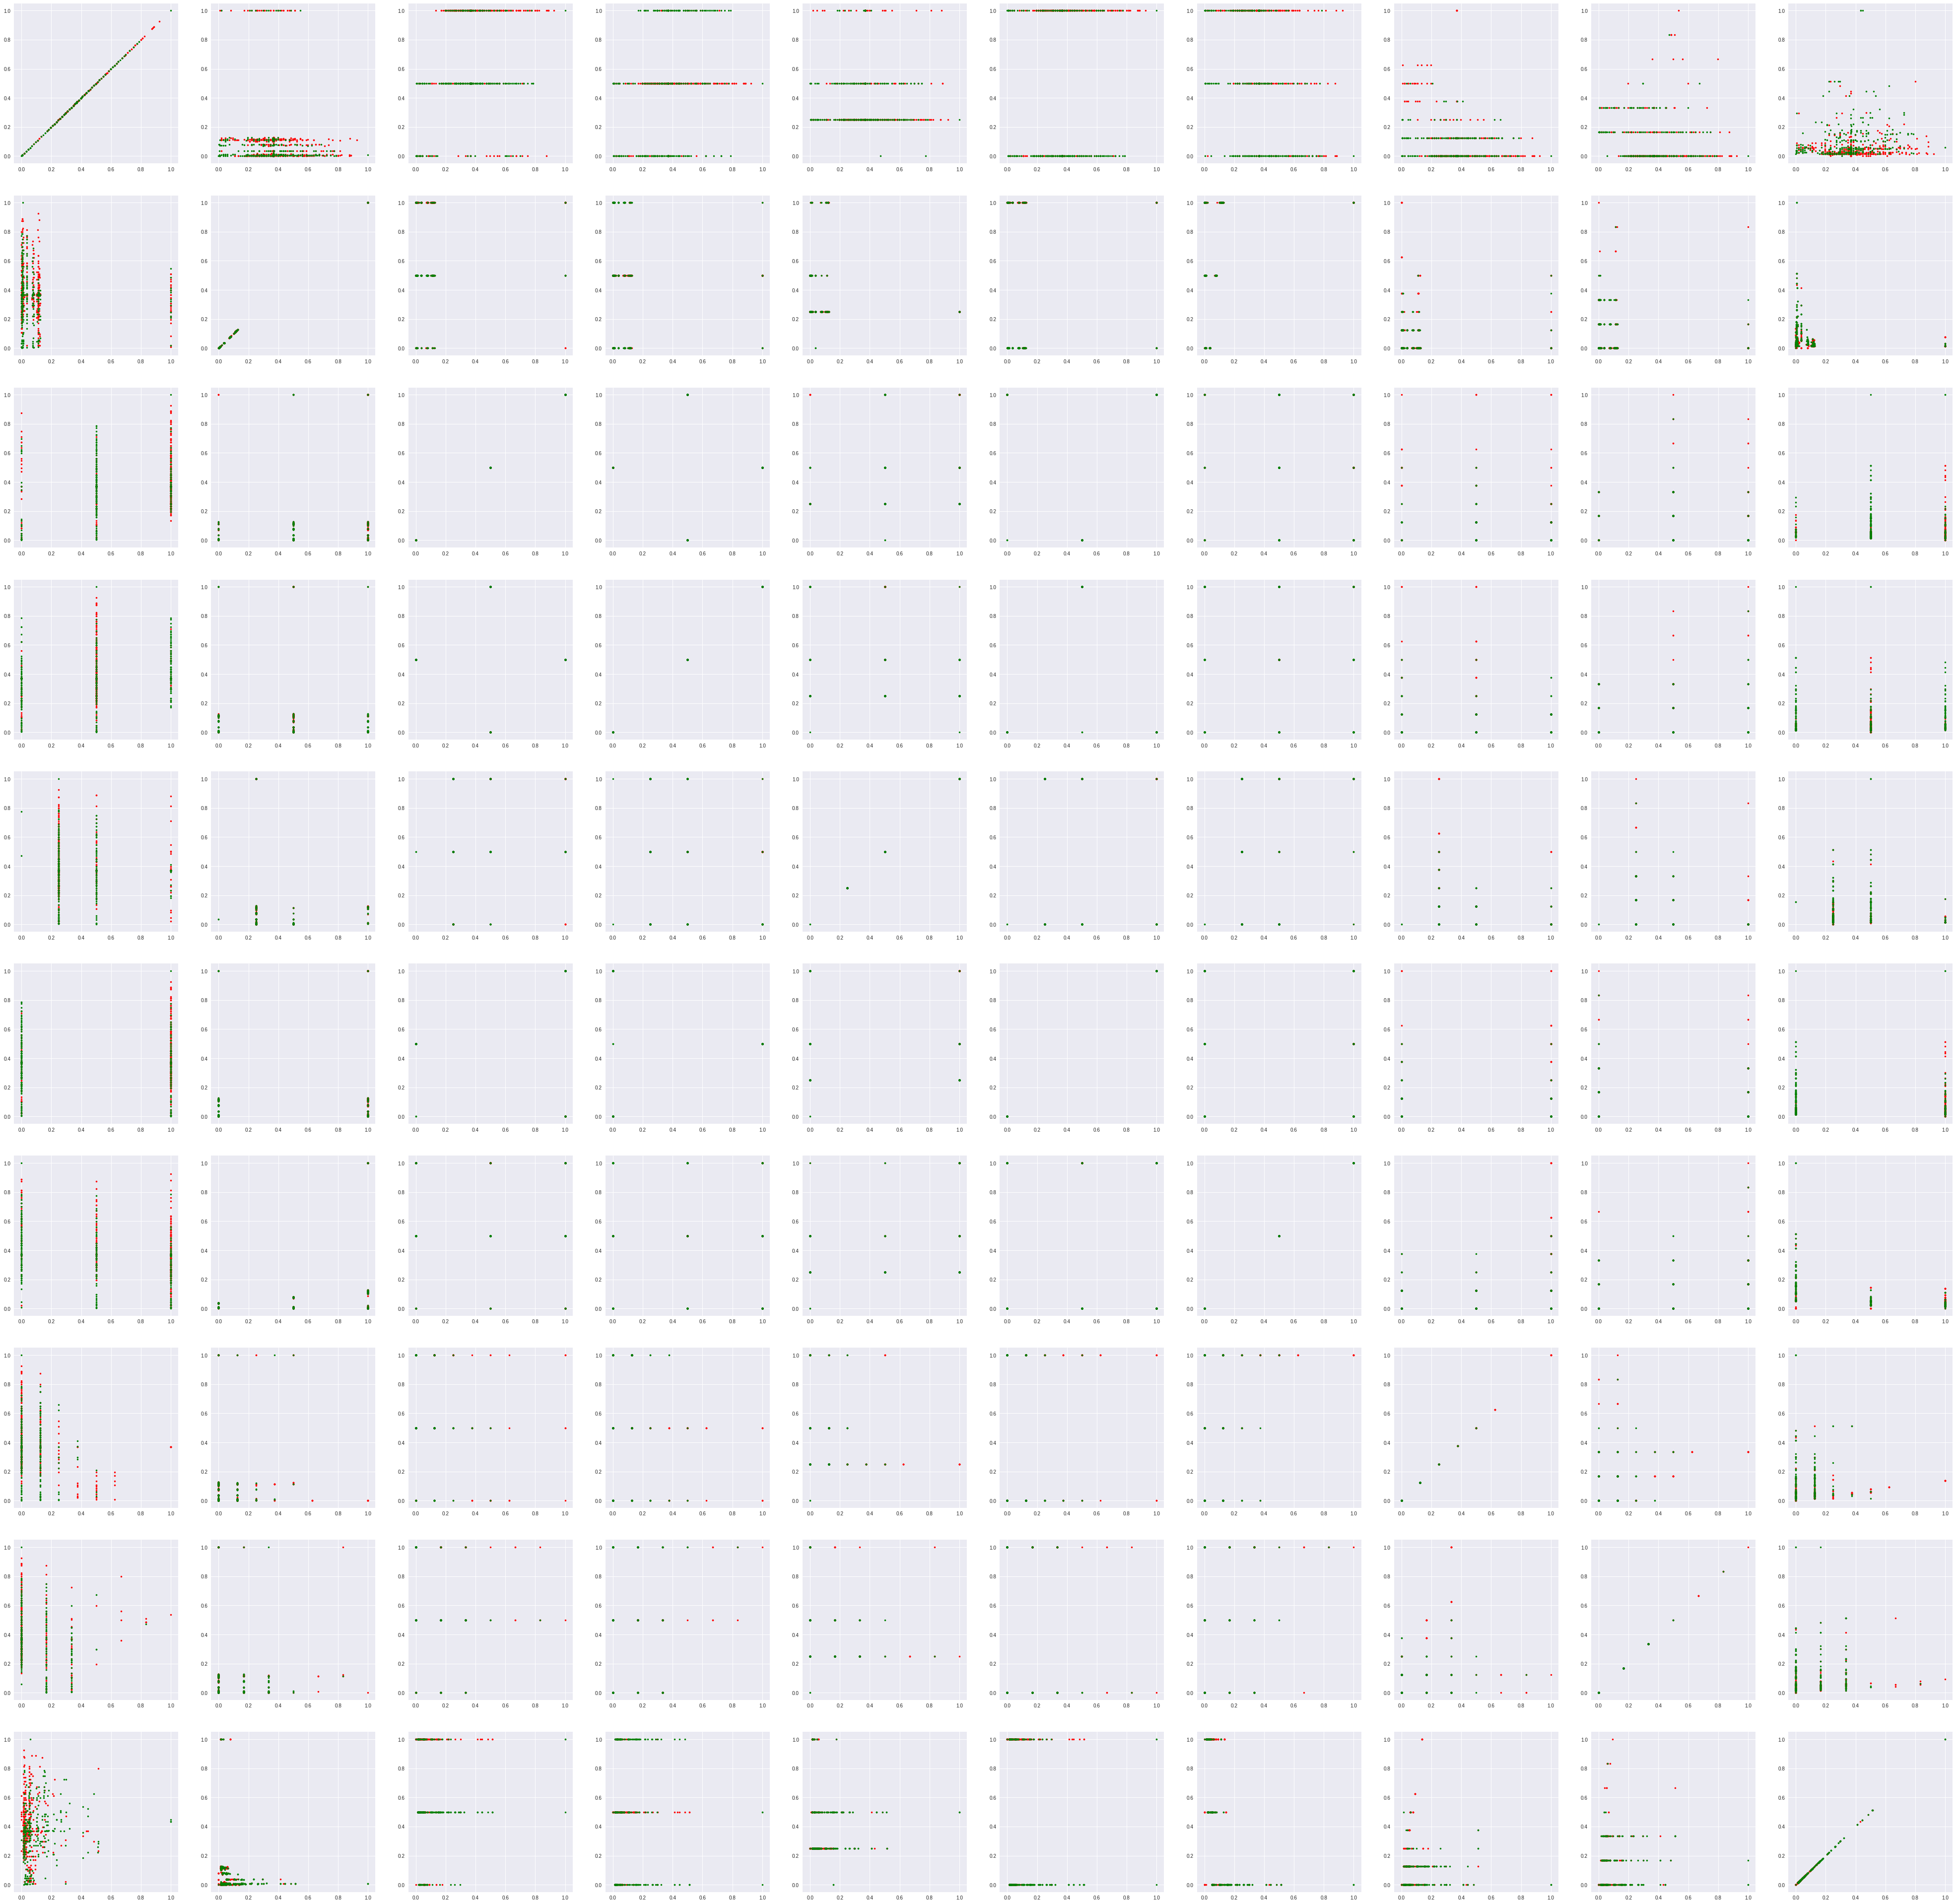

In [30]:
from pylab import *

def plotthemall1(a,b):
    return py.plot(X[y==0,a],X[y==0,b],'r.') 
def plotthemall2(a,b):
    return py.plot(X[y==1,a],X[y==1,b],'g.') 
def plotthemall3(a,b): 
    return py.plot(X[y==2,a],X[y==2,b],'b.')

def puttogether(a,b):
    c = plotthemall1(a,b)
    d = plotthemall2(a,b)
    e = plotthemall3(a,b)
    return c,d,e

figure(figsize=(70,70))

for f in range(0,10):
    for g in range(0,10):
        subplot(10,10,f*10+g+1)
        puttogether(f,g)

In [31]:
for z in range(0,10):
    for w in range(z,10):
        XNew = X[:,[z]]*X[:,[w]]
        X = np.append(X,XNew, axis=1)

We have multiplied all cells together!

In [32]:
X.shape

(891, 65)

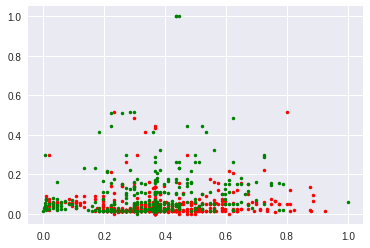

In [33]:
py.plot(X[y==0,0],X[y==0,9],'r.')
py.plot(X[y==1,0],X[y==1,9],'g.')

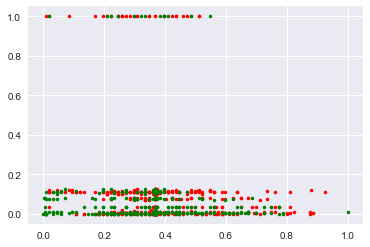

In [51]:
py.plot(X[y==0,0],X[y==0,1],'r.')
py.plot(X[y==1,0],X[y==1,1],'g.')

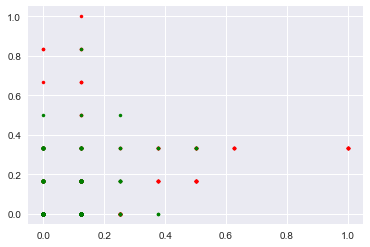

In [52]:
py.plot(X[y==0,7],X[y==0,8],'r.')
py.plot(X[y==1,7],X[y==1,8],'g.')

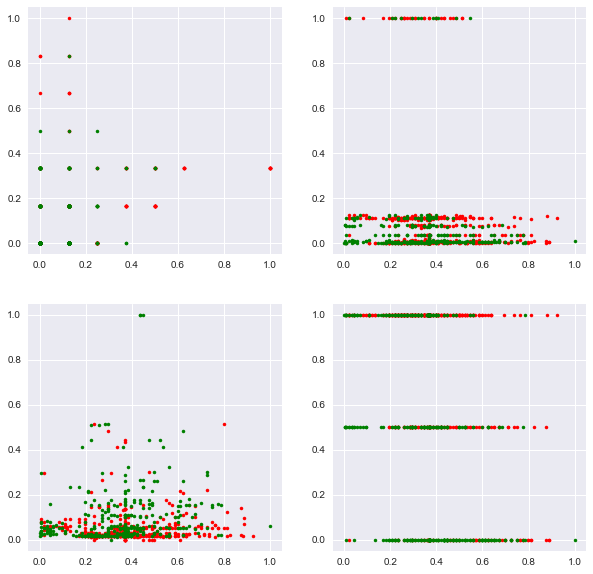

In [60]:
from pylab import *
figure(figsize=(10,10))

subplot(2,2,1)
py.plot(X[y==0,7],X[y==0,8],'r.')
py.plot(X[y==1,7],X[y==1,8],'g.')
subplot(2,2,2)
py.plot(X[y==0,0],X[y==0,1],'r.')
py.plot(X[y==1,0],X[y==1,1],'g.')
subplot(2,2,3)
py.plot(X[y==0,0],X[y==0,9],'r.')
py.plot(X[y==1,0],X[y==1,9],'g.')
subplot(2,2,4)
py.plot(X[y==0,0],X[y==0,6],'r.')
py.plot(X[y==1,0],X[y==1,6],'g.')

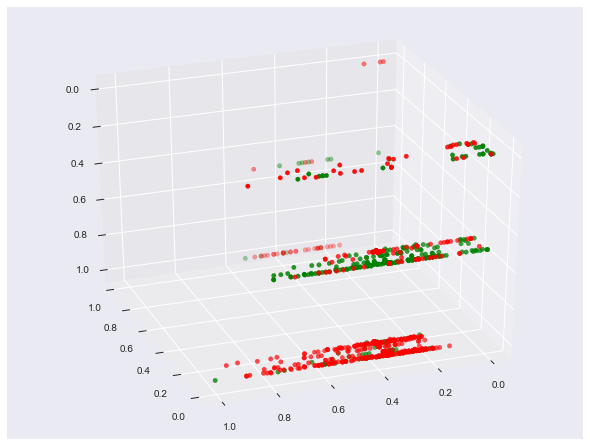

In [36]:
fig = py.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(X[y==0, 0], X[y==0, 1], X[y==0, 2], c='r')
ax.scatter(X[y==1, 0], X[y==1, 1], X[y==1, 2], c='g')
py.show()

# Data processing

##  Principle Component Analysis (PCA)

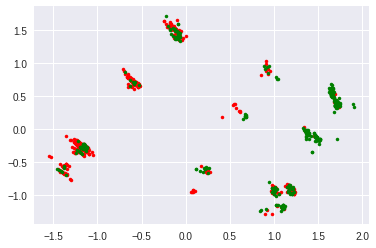

In [41]:
from sklearn.decomposition import PCA

XPCA = PCA(n_components=20).fit_transform(X)
py.plot(XPCA[y==0,0],XPCA[y==0,1],'r.')
py.plot(XPCA[y==1,0],XPCA[y==1,1],'g.')

In [42]:
from sklearn.manifold import TSNE


X_embedded = TSNE(n_components=2).fit_transform(XPCA)
X_embedded.shape

(891, 2)

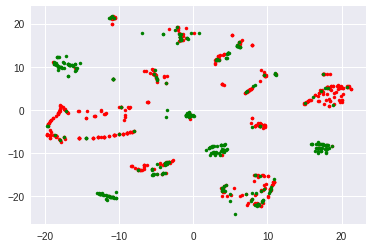

In [43]:
py.plot(X_embedded[y==0,0],X_embedded[y==0,1],'r.')
py.plot(X_embedded[y==1,0],X_embedded[y==1,1],'g.')

[  3.96930622e-01   2.05151350e-01   1.23046228e-01   8.31050270e-02
   5.05377038e-02   4.34631275e-02   1.91640262e-02   1.40675837e-02
   1.29763827e-02   9.22373803e-03   8.79089368e-03   6.01955527e-03
   4.44208612e-03   2.77131713e-03   2.68929820e-03   2.31220392e-03
   1.51892063e-03   1.43508648e-03   1.34086133e-03   1.19086013e-03
   1.12416926e-03   1.06981373e-03   9.40984487e-04   7.89058245e-04
   7.65502960e-04   6.09364469e-04   5.60067156e-04   5.37382575e-04
   4.34220952e-04   3.94530530e-04   3.16845105e-04   2.78142427e-04
   2.55578908e-04   2.14927428e-04   2.02826190e-04   1.75319441e-04
   1.58450238e-04   1.32869436e-04   1.12178938e-04   1.06087371e-04
   9.38487839e-05   8.59338487e-05   6.84492814e-05   5.03994661e-05
   4.40173544e-05   4.19947367e-05   4.03332080e-05   3.31039102e-05
   3.23660820e-05   2.45050997e-05   2.40328815e-05   2.12741569e-05
   1.88463673e-05   1.78613277e-05   1.45506662e-05   1.11074481e-05
   9.41815517e-06   6.08886696e-06

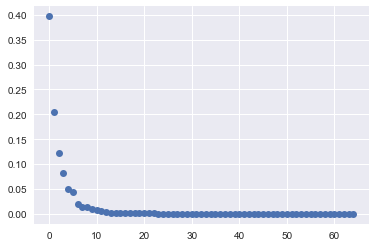

In [88]:
from sklearn.decomposition import PCA


pca = PCA(n_components=65)
#XPCA = pca.fit_transform(X)
XPCA1 = pca.fit_transform(X)
py.plot(pca.explained_variance_ratio_,'o');


print(pca.explained_variance_ratio_)

Just as one can project from a high dimensional space to a two-dimensional space, one can also do the same thing to project to a three-dimensional space.

# Our first classification tool, K-Nearest Neighbors.

http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

n_neighbors : int, optional (default = 5)
Number of neighbors to use by default for k_neighbors queries.

weights : str or callable, optional (default = ‘uniform’)
weight function used in prediction. Possible values:
‘uniform’ : uniform weights. All points in each neighborhood are weighted equally.
‘distance’ : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.
[callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.

metric : string or DistanceMetric object (default = ‘minkowski’)
the distance metric to use for the tree. The default metric is minkowski, and with p=2 is equivalent to the standard Euclidean metric. See the documentation of the DistanceMetric class for a list of available metrics. 

p : integer, optional (default = 2)
Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.

metric_params : dict, optional (default = None)
Additional keyword arguments for the metric function.

In [37]:
# Import the K-NN solver
from sklearn import neighbors

http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html

C : float, optional (default=1.0)
Penalty parameter C of the error term.

loss : string, ‘hinge’ or ‘squared_hinge’ (default=’squared_hinge’)
Specifies the loss function. ‘hinge’ is the standard SVM loss (used e.g. by the SVC class) while ‘squared_hinge’ is the square of the hinge loss.

penalty : string, ‘l1’ or ‘l2’ (default=’l2’)
Specifies the norm used in the penalization. The ‘l2’ penalty is the standard used in SVC. The ‘l1’ leads to coef_ vectors that are sparse.

class_weight : {dict, ‘balanced’}, optional
Set the parameter C of class i to class_weight[i]*C for SVC. If not given, all classes are supposed to have weight one. The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))

In [34]:
# Load in a classifier
from sklearn import svm

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier

criterion : string, optional (default=”gini”)
The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.

max_depth : int or None, optional (default=None)
The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

min_samples_split : int, float, optional (default=2)
The minimum number of samples required to split an internal node:
If int, then consider min_samples_split as the minimum number.
If float, then min_samples_split is a percentage and ceil(min_samples_split * n_samples) are the minimum number of samples for each split.

min_samples_leaf : int, float, optional (default=1)
The minimum number of samples required to be at a leaf node:
If int, then consider min_samples_leaf as the minimum number.
If float, then min_samples_leaf is a percentage and ceil(min_samples_leaf * n_samples) are the minimum number of samples for each node.

max_leaf_nodes : int or None, optional (default=None)
Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.

class_weight : dict, list of dicts, “balanced” or None, optional (default=None)
Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one. For multi-output problems, a list of dicts can be provided in the same order as the columns of y.
The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))
For multi-output, the weights of each column of y will be multiplied.
Note that these weights will be multiplied with sample_weight (passed through the fit method) if sample_weight is specified.

In [35]:
# Decision tree classifier
from sklearn import tree

http://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html

n_components : int, optional
Number of components (< n_classes - 1) for dimensionality reduction.

In [36]:
# Linear Disciminant Analysis
from sklearn import discriminant_analysis

In [37]:
#neural net
from sklearn import neural_network

In [38]:
 #gaussian process
from sklearn import gaussian_process

In [39]:
#Naive Bayes
from sklearn import naive_bayes

In [38]:
# This is the one complicated bit of code in the whole demo.  There is no need to modify it, but please feel free if you want!
def runTest(clf,X,y,trainingPercent=0.66):
    # A little cheat to make the pictures consistent
    np.random.seed(123)
    
    # If there is one thing that I want to harp on, it is the difference
    # between testing and training errors!  So, here we create a training
    # set on which we computer the parameters of our algorithm, and a 
    # testing set for seeing how well we generalize (and work on real 
    # world problems).
    perm = np.random.permutation(len(y))
    n = X.shape[0]
    trainSize = int(trainingPercent*n)
    Xtrain = X[perm[:trainSize],0:2]
    Xtest = X[perm[trainSize:],0:2]

    yHat = y
    yHattrain = yHat[perm[:trainSize]]
    yHattest = yHat[perm[trainSize:]]

    # Run the calculation!
    clf.fit(Xtrain, yHattrain)
    
    # step size in the mesh for plotting the decision boundary.
    h = .02  
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)

    py.figure(1, figsize=(8, 6))
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    py.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    py.scatter(Xtrain[:, 0], Xtrain[:, 1], c=yHattrain, cmap=cmap_bold,marker='o')
    py.scatter(Xtest[:, 0], Xtest[:, 1], c=yHattest, cmap=cmap_bold,marker='+')
    py.xlim(xx.min(), xx.max())
    py.ylim(yy.min(), yy.max())
    py.show()

    # Print out some metrics
    # This score is the Jaccard Index
    # https://en.wikipedia.org/wiki/Jaccard_index
    print('training score',clf.score(Xtrain,yHattrain))
    print('testing score',clf.score(Xtest,yHattest))

In [41]:
# This is the one complicated bit of code in the whole demo.  There is no need to modify it, but please feel free if you want!
def runTest3D(clf,X,y,p=2,trainingPercent=0.66):
    # A little cheat to make the pictures consistent
    #np.random.seed(123)
    
    # If there is one thing that I want to harp on, it is the difference
    # between testing and training errors!  So, here we create a training
    # set on which we computer the parameters of our algorithm, and a 
    # testing set for seeing how well we generalize (and work on real 
    # world problems).
    perm = np.random.permutation(len(y))
    n = X.shape[0]
    trainSize = int(trainingPercent*n)
    Xtrain = X[perm[:trainSize],0:p]
    Xtest = X[perm[trainSize:],0:p]

    yHat = y
    yHattrain = yHat[perm[:trainSize]]
    yHattest = yHat[perm[trainSize:]]

    # Run the calculation!
    clf.fit(Xtrain, yHattrain)
    
    # step size in the mesh for plotting the decision boundary.
    #h = .02  
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    #x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
   # y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    #xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                           #  np.arange(y_min, y_max, h))
    #Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
   # Z = Z.reshape(xx.shape)

    #py.figure(1, figsize=(8, 6))
    #cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    #cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
   # py.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    #py.scatter(Xtrain[:, 0], Xtrain[:, 1], c=yHattrain, cmap=cmap_bold,marker='o')
    #py.scatter(Xtest[:, 0], Xtest[:, 1], c=yHattest, cmap=cmap_bold,marker='+')
    #py.xlim(xx.min(), xx.max())
    #py.ylim(yy.min(), yy.max())
    #py.show()

    # Print out some metrics
    # This score is the Jaccard Index
    # https://en.wikipedia.org/wiki/Jaccard_index
    print('training score',clf.score(Xtrain,yHattrain))
    print('testing score',clf.score(Xtest,yHattest))

## Testing the data Gaussian Process Classifer

Thinking about what must have to been going on, we decided to try a different projection of the data.

In [123]:
clf = gaussian_process.GaussianProcessClassifier ()
runTest3D(clf,XPCA[:,0:20],y,20)

training score 0.857142857143
testing score 0.811881188119


In [118]:
clf = naive_bayes.GaussianNB()
runTest3D(clf,XPCA[:,0:20],y,20)

training score 0.790816326531
testing score 0.80198019802


In [107]:
clf = neighbors.KNeighborsClassifier(n_neighbors=5)
runTest3D(clf,XPCA[:,[0,40]],y,40)

training score 0.853741496599
testing score 0.782178217822


Ran all cells to here! And go back to top and run for data1.

In [124]:
clf = gaussian_process.GaussianProcessClassifier ()
#clf = neighbors.KNeighborsClassifier(n_neighbors=5)
clf.fit(XPCA[:,0:20], y)
predictions = clf.predict(XPCA1[:,0:20])

In [127]:
pred = predictions*predictions
print(pred)

[0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 0 1 0
 1 0 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 1 1 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0
 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 0 1 0 1 1 0 1 0 0 0]


In [128]:
X = np.insert(X,0,pred, axis=1) #cannot figure how to make axis =1 to work so hacked around it
X = np.insert(X, 0, passid, axis=1)
prediction= X[:,0:2]
np.savetxt("predictbest.csv", prediction, delimiter=",")

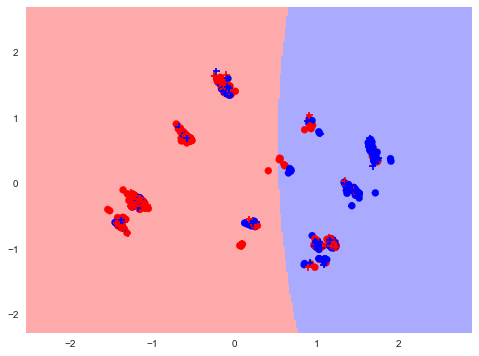

training score 0.78231292517
testing score 0.805280528053


In [56]:
clf = naive_bayes.GaussianNB()
runTest(clf,XPCA[:,[0,1]],y)

In [104]:
clf = neighbors.KNeighborsClassifier(n_neighbors=2)
runTest3D(clf,XPCA[:,0:20],y,20)

training score 0.897959183673
testing score 0.788778877888


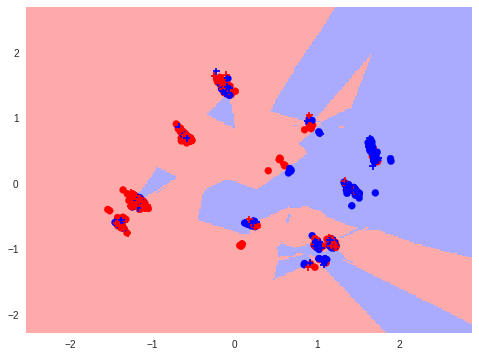

training score 0.8690476190476191
testing score 0.801980198019802


In [39]:
clf = neighbors.KNeighborsClassifier(n_neighbors=5)
runTest(clf,XPCA[:,0:2],y)

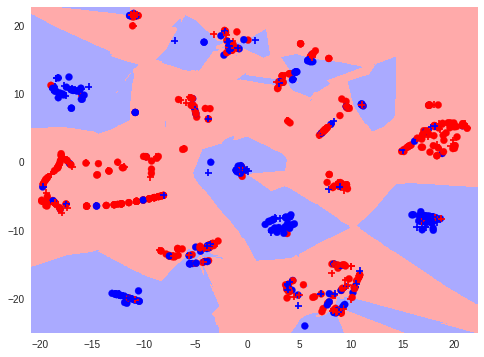

training score 0.8656462585034014
testing score 0.7986798679867987


In [44]:
clf = neighbors.KNeighborsClassifier(n_neighbors=5)
runTest(clf,X_embedded[:,0:2],y)

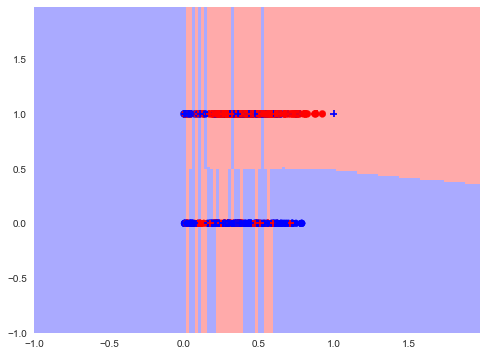

training score 0.78231292517
testing score 0.719471947195


In [51]:
clf = neighbors.KNeighborsClassifier(n_neighbors=1)
runTest(clf,X[:,[0,5]],y)

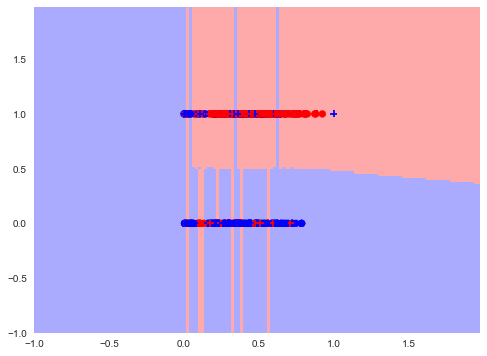

training score 0.811224489796
testing score 0.772277227723


In [81]:
clf = neighbors.KNeighborsClassifier(n_neighbors=5)
runTest(clf,X[:,[0,5]],y)

## More advanced techniques and other explorations

Getting just a bit fancier, we actually do PCA!!

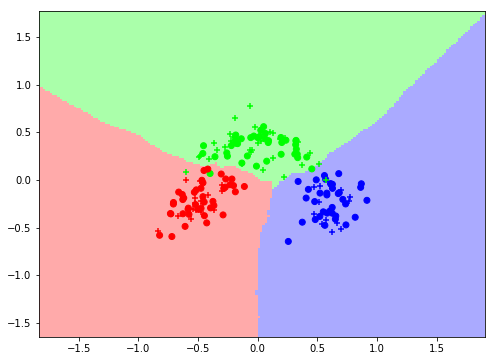

training score 0.982905982906
testing score 0.950819672131


In [70]:
clf = neighbors.KNeighborsClassifier(n_neighbors=5)
runTest(clf,XPCA[:,[0,1]],y)

What happens if we reduce the training data by a lot?

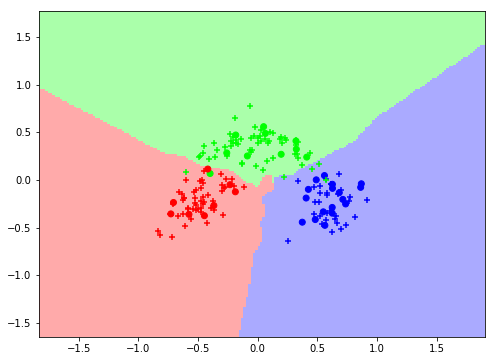

training score 0.971428571429
testing score 0.965034965035


In [71]:
clf = neighbors.KNeighborsClassifier(n_neighbors=5)
runTest(clf,XPCA[:,[0,1]],y, trainingPercent = 0.2)

## Linear SVC

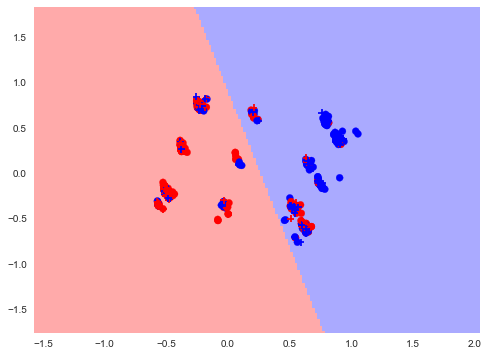

training score 0.784013605442
testing score 0.795379537954


In [45]:
clf = svm.LinearSVC()
runTest(clf,XPCA[:,[0,1]],y)

## Decision Tree

In [80]:
clf = tree.DecisionTreeClassifier(max_depth=2)
runTest3D(clf,XPCA[:,0:20],y,20)

training score 0.802721088435
testing score 0.759075907591


## Linear Discriminant Analysis

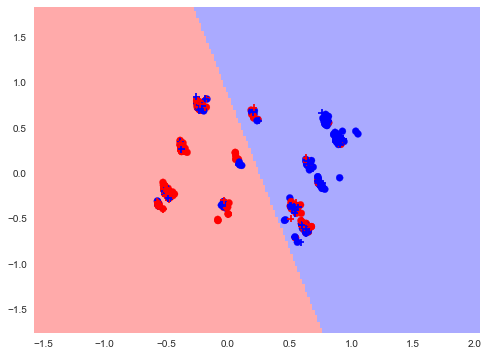

training score 0.784013605442
testing score 0.795379537954


In [66]:
clf = discriminant_analysis.LinearDiscriminantAnalysis()
runTest(clf,XPCA[:,[0,1]],y)